# 神经网络

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import mglearn

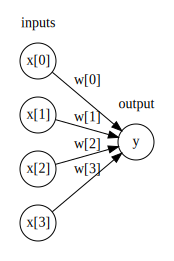

In [3]:
display(mglearn.plots.plot_logistic_regression_graph())

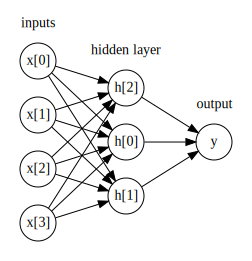

In [4]:
display(mglearn.plots.plot_single_hidden_layer_graph())

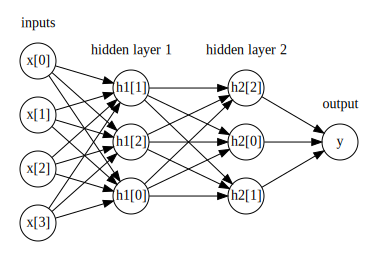

In [5]:
display(mglearn.plots.plot_two_hidden_layer_graph())

Text(0,0.5,'Feature 1')

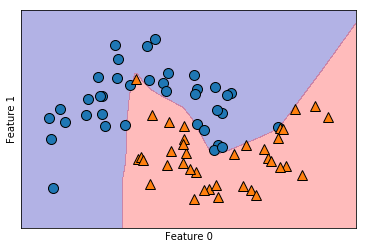

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=100,noise=0.25,random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)
mlp=MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)  #100个隐节点 activation='relu'
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

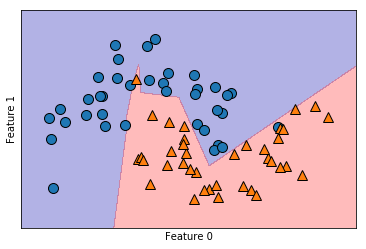

In [9]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

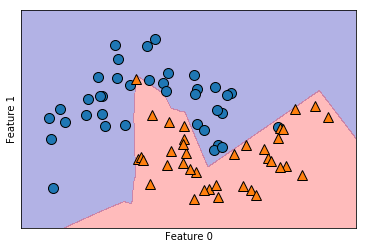

In [10]:
# 使用2个隐层，每个包含10个单元
mlp = MLPClassifier(solver='lbfgs', random_state=0,
hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

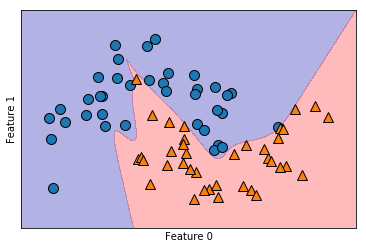

In [11]:
# 使用2个隐层，每个包含10个单元，这次使用tanh非线性
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

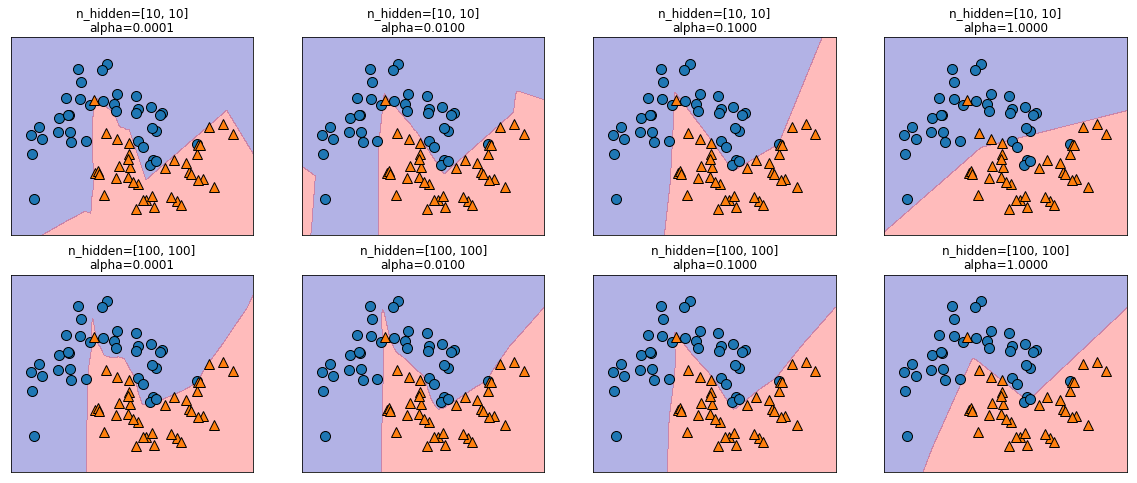

In [13]:
#我们还可以利用 L2 惩罚使权重趋向于 0，从而控制神经网络的复杂度
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
            n_hidden_nodes, n_hidden_nodes, alpha))

In [ ]:
'''
在机器学习的许多应用中，神经网络再次成为最先进的模型。它的主要优点之一是能够获
取大量数据中包含的信息，并构建无比复杂的模型。给定足够的计算时间和数据，并且仔
细调节参数，神经网络通常可以打败其他机器学习算法（无论是分类任务还是回归任务）。
这就引出了下面要说的缺点。神经网络——特别是功能强大的大型神经网络——通常需要
很长的训练时间。它还需要仔细地预处理数据，正如我们这里所看到的。与 SVM 类似，
神经网络在“均匀”数据上的性能最好，其中“均匀”是指所有特征都具有相似的含义。
如果数据包含不同种类的特征，那么基于树的模型可能表现得更好。神经网络调参本身也
是一门艺术。调节神经网络模型和训练模型的方法有很多种，我们只是蜻蜓点水地尝试了
几种而已。
估计神经网络的复杂度。 最重要的参数是层数和每层的隐单元个数。你应该首先设置 1 个
或 2 个隐层，然后可以逐步增加。每个隐层的结点个数通常与输入特征个数接近，但在几
千个结点时很少会多于特征个数。
在考虑神经网络的模型复杂度时，一个有用的度量是学到的权重（或系数）的个数。如果
你有一个包含 100 个特征的二分类数据集，模型有 100 个隐单元，那么输入层和第一个隐
层之间就有 100 * 100 = 10 000 个权重。在隐层和输出层之间还有 100 * 1 = 100 个权重，总
共约 10 100 个权重。如果添加含有 100 个隐单元的第二个隐层，那么在第一个隐层和第二
个隐层之间又有 100 * 100 = 10 000 个权重，总数变为约 20 100 个权重。如果你使用包含
1000 个隐单元的单隐层，那么在输入层和隐层之间需要学习 100 * 1000 = 100 000 个权重，
隐层到输出层之间需要学习 1000 * 1 = 1000 个权重，总共 101 000 个权重。如果再添加第
二个隐层，就会增加 1000 * 1000 = 1 000 000 个权重，总数变为巨大的 1 101 000 个权重，
这比含有 2 个隐层、每层 100 个单元的模型要大 50 倍。
神经网络调参的常用方法是，首先创建一个大到足以过拟合的网络，确保这个网络可以对
任务进行学习。知道训练数据可以被学习之后，要么缩小网络，要么增大 alpha 来增强正
则化，这可以提高泛化性能。
在我们的实验中，主要关注模型的定义：层数、每层的结点个数、正则化和非线性。这些
内容定义了我们想要学习的模型。还有一个问题是， 如何学习模型或用来学习参数的算
法，这一点由 solver 参数设定。 solver 有两个好用的选项。默认选项是 'adam'，在大多
数情况下效果都很好，但对数据的缩放相当敏感（因此，始终将数据缩放为均值为 0、方
差为 1 是很重要的）。另一个选项是 'lbfgs'，其鲁棒性相当好，但在大型模型或大型数据
集上的时间会比较长。还有更高级的 'sgd' 选项，许多深度学习研究人员都会用到。 'sgd'
选项还有许多其他参数需要调节，以便获得最佳结果。你可以在用户指南中找到所有这些监督学习 ｜ 91
参数及其定义。当你开始使用 MLP 时，我们建议使用 'adam' 和 'lbfgs'。
'''